### Introduction

Maintenant qu'on a notre VCF avec nos 590 724 SNPs de bonne qualité.

L'objectif est d'obtenir une PCA a partir de ces SNPs :

### Rappels

296 individus de référence : Black (Mellifera), Yellow(Ligustica), Green(Caucasia) se trouvant dans : /work/genphyse/cytogen/Alain/seqapipopOnHAV3_1/seqApiPopVcfFilteredSonia/plinkAnalyses/WindowSNPs/RFMix/Pure95/in/IndsPopReference.list

```
head -10 IndsPopReference.list
Ab-PacBio	Black
BER10	Yellow
BER11	Yellow
BER12	Yellow
BER13	Yellow
BER14	Yellow
BER15	Yellow
BER16	Yellow
BER18	Yellow
BER19	Yellow
```

44 individus Corse a qui on associera comme couleur "blue" : 
/genphyse/cytogen/seqapipop/Data/Apis-mellifera/seqapipopOnHAV3_1/CORjaune/IndividuCOR44_ancien.list

```
head -3 IndividuCOR44_ancien.list
AOC10	blue
AOC11	blue
AOC12	blue
``` 
Et nos 63 nouveaux individus Corse à qui on associera comme couleur "red" :
/genphyse/cytogen/seqapipop/Data/Apis-mellifera/seqapipopOnHAV3_1/CORjaune/IndividuCORjaune63.list

```
head -3 IndividuCORjaune63.list
CORjaune10	red
CORjaune11	red
CORjaune12	red
```

On s'attend a une ACP avec 3 groupes BLACK / YELLOW / GREEN comprennant nos individus de référence.
Comme dans l'article, les anciens individus Corse, se situante entre les individus YELLOW et BLACK 

### Ajout dans les data

Finalement on va remplacer les couleurs par les noms d'espèces en 5 groupes: 

qu'on trouvera dans le fichier 'couleur_sort_individu'

- Black : Mellifera
- Green : Caucasia
- Orange : Ligustica.Royal Jelly.Carnica
- Red : Corse Nouvelles
- Blue : Corse Anciennes

Cela nous servira pour trier par la suite par espèce dans le plot de la PCA




### Debut du Plot:

In [1]:
setwd ("/home/avignal/Stage_M2/PlinkACP/plink/")


In [2]:
#Lecture et réarrangement des Data


eigenvec <- read.table('sorted_PCA_SeqApiPop_403_LD03.eigenvec', header = FALSE, skip=0, sep = ' ')
rownames(eigenvec) <- eigenvec[,2] # on enlève la deuxieme colone redondante
eigenvec <- eigenvec[,3:ncol(eigenvec)]
colnames(eigenvec) <- paste('Principal.Component. ', c(1:20), sep = '')

eigenvec

,Principal.Component. 1,Principal.Component. 2,Principal.Component. 3,Principal.Component. 4,Principal.Component. 5,Principal.Component. 6,Principal.Component. 7,Principal.Component. 8,Principal.Component. 9,Principal.Component. 10,Principal.Component. 11,Principal.Component. 12,Principal.Component. 13,Principal.Component. 14,Principal.Component. 15,Principal.Component. 16,Principal.Component. 17,Principal.Component. 18,Principal.Component. 19,Principal.Component. 20
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Ab-PacBio,0.0529080,0.00244668,0.05363040,-0.0352004,0.0289813,-0.0966531,-2.80802e-02,0.00182384,0.0108513,0.000415669,5.98211e-04,8.05942e-04,1.04832e-03,-7.54000e-04,-5.54256e-04,-4.06405e-04,-8.34656e-05,-5.79344e-04,0.000614902,8.66883e-04
AOC10,0.0214301,0.00732940,0.00899092,0.0481961,0.0326964,0.0345816,-3.82077e-04,-0.01104160,-0.0438832,-0.000245611,-8.02539e-05,1.58182e-03,-1.17293e-03,-1.22113e-03,1.10382e-03,1.33751e-03,-4.10789e-04,2.12435e-03,0.002435400,1.62384e-03
AOC11,0.0212416,0.00792505,0.01143350,0.0454902,0.0292201,0.0295928,-4.82164e-03,-0.00768436,-0.0317105,-0.001131100,9.44703e-04,2.90791e-03,3.67380e-04,2.01229e-03,5.97761e-04,-8.23973e-06,1.15585e-03,-2.45061e-03,0.000437679,6.97422e-04
AOC12,0.0203242,0.00840290,0.01068850,0.0467117,0.0326449,0.0326058,1.00988e-03,-0.00928108,-0.0455404,-0.000493906,-1.58167e-03,-2.53945e-04,-2.26169e-04,2.36364e-04,7.28524e-04,-1.62989e-04,9.67244e-04,-1.27729e-03,0.000300538,-6.24591e-04
AOC14,0.0140857,0.00899600,0.00728239,0.0437598,0.0268234,0.0312624,-1.70391e-02,-0.01049850,-0.0282068,0.000272647,2.31710e-03,1.01233e-03,4.56922e-04,-1.98663e-03,-2.12550e-04,1.12885e-03,-1.33370e-04,4.04640e-05,0.001894880,6.71111e-04
AOC15,0.0243111,0.00882894,0.00882376,0.0473273,0.0329337,0.0301375,1.45395e-03,-0.00809806,-0.0332278,-0.000839850,3.77806e-04,5.63616e-05,3.40598e-04,9.98640e-04,1.34721e-03,6.69687e-04,1.79494e-03,-3.02995e-04,0.001410190,-3.41481e-04
AOC16,0.0207491,0.00855543,0.01156380,0.0490731,0.0338687,0.0351786,-3.61524e-03,-0.00893103,-0.0399893,0.000175433,-8.91500e-04,6.24677e-04,1.04643e-03,1.47118e-03,3.74451e-04,3.31491e-05,4.88724e-05,3.56634e-04,0.000887714,-5.05014e-04
AOC17,0.0262093,0.00827064,0.01195660,0.0428548,0.0298624,0.0294603,1.60603e-03,-0.00676308,-0.0231357,-0.001270010,-1.72139e-03,-5.05111e-04,1.08171e-03,-4.74692e-04,5.92395e-06,1.47608e-03,-1.32110e-03,5.95453e-04,0.001210880,4.65324e-04
AOC18,0.0220138,0.00474274,0.01003790,0.0478346,0.0337132,0.0321316,5.67923e-03,-0.00857449,-0.0546629,0.001166020,-1.37448e-03,-4.11183e-04,1.62936e-03,2.59425e-04,1.34188e-03,8.15276e-05,3.99437e-04,-1.89000e-03,0.002766320,1.82555e-03


In [3]:
# Lecture de la data pour les espèces

couleur <- read.table('couleur_sort_individu', sep="\t", header=TRUE, row.names=1)
couleur
cl=couleur[,1]
cl

,Species
,<fct>
AbPacBio,Mellifera
AOC10,CorseAnciennes
AOC11,CorseAnciennes
AOC12,CorseAnciennes
AOC14,CorseAnciennes
AOC15,CorseAnciennes
AOC16,CorseAnciennes
AOC17,CorseAnciennes
AOC18,CorseAnciennes


[1] Mellifera                    CorseAnciennes              
  [3] CorseAnciennes               CorseAnciennes              
  [5] CorseAnciennes               CorseAnciennes              
  [7] CorseAnciennes               CorseAnciennes              
  [9] CorseAnciennes               CorseAnciennes              
 [11] CorseAnciennes               CorseAnciennes              
 [13] CorseAnciennes               CorseAnciennes              
 [15] CorseAnciennes               CorseAnciennes              
 [17] CorseAnciennes               CorseAnciennes              
 [19] CorseAnciennes               CorseAnciennes              
 [21] CorseAnciennes               CorseAnciennes              
 [23] CorseAnciennes               CorseAnciennes              
 [25] CorseAnciennes               CorseAnciennes              
 [27] CorseAnciennes               CorseAnciennes              
 [29] CorseAnciennes               CorseAnciennes              
 [31] CorseAnciennes               CorseAnciennes              
 [33] CorseAnciennes               CorseAnciennes              
 [35] CorseAnciennes               CorseAnciennes              
 [37] CorseAnciennes               CorseAnciennes              
 [39] Ligustica.RoyalJelly.Carnica Ligustica.RoyalJelly.Carnica
 [41] Ligustica.RoyalJelly.Carnica Ligustica.RoyalJelly.Carnica
 [43] Ligustica.RoyalJelly.Carnica Ligustica.RoyalJelly.Carnica
 [45] Ligustica.RoyalJelly.Carnica Ligustica.RoyalJelly.Carnica
 [47] Ligustica.RoyalJelly.Carnica Ligustica.RoyalJelly.Carnica
 [49] Ligustica.RoyalJelly.Carnica Ligustica.RoyalJelly.Carnica
 [51] Ligustica.RoyalJelly.Carnica Ligustica.RoyalJelly.Carnica
 [53] Ligustica.RoyalJelly.Carnica Ligustica.RoyalJelly.Carnica
 [55] Mellifera                    Caucasia                    
 [57] Mellifera                    Mellifera                   
 [59] Mellifera                    Mellifera                   
 [61] Ligustica.RoyalJelly.Carnica Ligustica.RoyalJelly.Carnica
 [63] Ligustica.RoyalJelly.Carnica Ligustica.RoyalJelly.Carnica
 [65] Ligustica.RoyalJelly.Carnica Ligustica.RoyalJelly.Carnica
 [67] Ligustica.RoyalJelly.Carnica Ligustica.RoyalJelly.Carnica
 [69] Ligustica.RoyalJelly.Carnica Ligustica.RoyalJelly.Carnica
 [71] Ligustica.RoyalJelly.Carnica Ligustica.RoyalJelly.Carnica
 [73] Ligustica.RoyalJelly.Carnica Ligustica.RoyalJelly.Carnica
 [75] Ligustica.RoyalJelly.Carnica Ligustica.RoyalJelly.Carnica
 [77] Ligustica.RoyalJelly.Carnica Ligustica.RoyalJelly.Carnica
 [79] Ligustica.RoyalJelly.Carnica Ligustica.RoyalJelly.Carnica
 [81] Caucasia                     Caucasia                    
 [83] Caucasia                     Caucasia                    
 [85] Caucasia                     Caucasia                    
 [87] Caucasia                     Caucasia                    
 [89] Caucasia                     Caucasia                    
 [91] Caucasia                     Caucasia                    
 [93] Caucasia                     Caucasia                    
 [95] Caucasia                     CorseNouvelles              
 [97] CorseNouvelles               CorseNouvelles              
 [99] CorseNouvelles               CorseNouvelles              
[101] CorseNouvelles               CorseNouvelles              
[103] CorseNouvelles               CorseNouvelles              
[105] CorseNouvelles               CorseNouvelles              
[107] CorseNouvelles               CorseNouvelles              
[109] CorseNouvelles               CorseNouvelles              
[111] CorseNouvelles               CorseNouvelles              
[113] CorseNouvelles               CorseNouvelles              
[115] CorseNouvelles               CorseNouvelles              
[117] CorseNouvelles               CorseNouvelles              
[119] CorseNouvelles               CorseNouvelles              
[121] CorseNouvelles               CorseNouvelles              
[123] CorseNouvelles               CorseNouvelles              
[125] CorseNouvelles              

In [4]:
# Ajout de la colone espèce aux data

cbind(eigenvec, cl)
eigenvec

,Principal.Component. 1,Principal.Component. 2,Principal.Component. 3,Principal.Component. 4,Principal.Component. 5,Principal.Component. 6,Principal.Component. 7,Principal.Component. 8,Principal.Component. 9,Principal.Component. 10,⋯,Principal.Component. 12,Principal.Component. 13,Principal.Component. 14,Principal.Component. 15,Principal.Component. 16,Principal.Component. 17,Principal.Component. 18,Principal.Component. 19,Principal.Component. 20,cl
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
Ab-PacBio,0.0529080,0.00244668,0.05363040,-0.0352004,0.0289813,-0.0966531,-2.80802e-02,0.00182384,0.0108513,0.000415669,⋯,8.05942e-04,1.04832e-03,-7.54000e-04,-5.54256e-04,-4.06405e-04,-8.34656e-05,-5.79344e-04,0.000614902,8.66883e-04,Mellifera
AOC10,0.0214301,0.00732940,0.00899092,0.0481961,0.0326964,0.0345816,-3.82077e-04,-0.01104160,-0.0438832,-0.000245611,⋯,1.58182e-03,-1.17293e-03,-1.22113e-03,1.10382e-03,1.33751e-03,-4.10789e-04,2.12435e-03,0.002435400,1.62384e-03,CorseAnciennes
AOC11,0.0212416,0.00792505,0.01143350,0.0454902,0.0292201,0.0295928,-4.82164e-03,-0.00768436,-0.0317105,-0.001131100,⋯,2.90791e-03,3.67380e-04,2.01229e-03,5.97761e-04,-8.23973e-06,1.15585e-03,-2.45061e-03,0.000437679,6.97422e-04,CorseAnciennes
AOC12,0.0203242,0.00840290,0.01068850,0.0467117,0.0326449,0.0326058,1.00988e-03,-0.00928108,-0.0455404,-0.000493906,⋯,-2.53945e-04,-2.26169e-04,2.36364e-04,7.28524e-04,-1.62989e-04,9.67244e-04,-1.27729e-03,0.000300538,-6.24591e-04,CorseAnciennes
AOC14,0.0140857,0.00899600,0.00728239,0.0437598,0.0268234,0.0312624,-1.70391e-02,-0.01049850,-0.0282068,0.000272647,⋯,1.01233e-03,4.56922e-04,-1.98663e-03,-2.12550e-04,1.12885e-03,-1.33370e-04,4.04640e-05,0.001894880,6.71111e-04,CorseAnciennes
AOC15,0.0243111,0.00882894,0.00882376,0.0473273,0.0329337,0.0301375,1.45395e-03,-0.00809806,-0.0332278,-0.000839850,⋯,5.63616e-05,3.40598e-04,9.98640e-04,1.34721e-03,6.69687e-04,1.79494e-03,-3.02995e-04,0.001410190,-3.41481e-04,CorseAnciennes
AOC16,0.0207491,0.00855543,0.01156380,0.0490731,0.0338687,0.0351786,-3.61524e-03,-0.00893103,-0.0399893,0.000175433,⋯,6.24677e-04,1.04643e-03,1.47118e-03,3.74451e-04,3.31491e-05,4.88724e-05,3.56634e-04,0.000887714,-5.05014e-04,CorseAnciennes
AOC17,0.0262093,0.00827064,0.01195660,0.0428548,0.0298624,0.0294603,1.60603e-03,-0.00676308,-0.0231357,-0.001270010,⋯,-5.05111e-04,1.08171e-03,-4.74692e-04,5.92395e-06,1.47608e-03,-1.32110e-03,5.95453e-04,0.001210880,4.65324e-04,CorseAnciennes
AOC18,0.0220138,0.00474274,0.01003790,0.0478346,0.0337132,0.0321316,5.67923e-03,-0.00857449,-0.0546629,0.001166020,⋯,-4.11183e-04,1.62936e-03,2.59425e-04,1.34188e-03,8.15276e-05,3.99437e-04,-1.89000e-03,0.002766320,1.82555e-03,CorseAnciennes


,Principal.Component. 1,Principal.Component. 2,Principal.Component. 3,Principal.Component. 4,Principal.Component. 5,Principal.Component. 6,Principal.Component. 7,Principal.Component. 8,Principal.Component. 9,Principal.Component. 10,Principal.Component. 11,Principal.Component. 12,Principal.Component. 13,Principal.Component. 14,Principal.Component. 15,Principal.Component. 16,Principal.Component. 17,Principal.Component. 18,Principal.Component. 19,Principal.Component. 20
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Ab-PacBio,0.0529080,0.00244668,0.05363040,-0.0352004,0.0289813,-0.0966531,-2.80802e-02,0.00182384,0.0108513,0.000415669,5.98211e-04,8.05942e-04,1.04832e-03,-7.54000e-04,-5.54256e-04,-4.06405e-04,-8.34656e-05,-5.79344e-04,0.000614902,8.66883e-04
AOC10,0.0214301,0.00732940,0.00899092,0.0481961,0.0326964,0.0345816,-3.82077e-04,-0.01104160,-0.0438832,-0.000245611,-8.02539e-05,1.58182e-03,-1.17293e-03,-1.22113e-03,1.10382e-03,1.33751e-03,-4.10789e-04,2.12435e-03,0.002435400,1.62384e-03
AOC11,0.0212416,0.00792505,0.01143350,0.0454902,0.0292201,0.0295928,-4.82164e-03,-0.00768436,-0.0317105,-0.001131100,9.44703e-04,2.90791e-03,3.67380e-04,2.01229e-03,5.97761e-04,-8.23973e-06,1.15585e-03,-2.45061e-03,0.000437679,6.97422e-04
AOC12,0.0203242,0.00840290,0.01068850,0.0467117,0.0326449,0.0326058,1.00988e-03,-0.00928108,-0.0455404,-0.000493906,-1.58167e-03,-2.53945e-04,-2.26169e-04,2.36364e-04,7.28524e-04,-1.62989e-04,9.67244e-04,-1.27729e-03,0.000300538,-6.24591e-04
AOC14,0.0140857,0.00899600,0.00728239,0.0437598,0.0268234,0.0312624,-1.70391e-02,-0.01049850,-0.0282068,0.000272647,2.31710e-03,1.01233e-03,4.56922e-04,-1.98663e-03,-2.12550e-04,1.12885e-03,-1.33370e-04,4.04640e-05,0.001894880,6.71111e-04
AOC15,0.0243111,0.00882894,0.00882376,0.0473273,0.0329337,0.0301375,1.45395e-03,-0.00809806,-0.0332278,-0.000839850,3.77806e-04,5.63616e-05,3.40598e-04,9.98640e-04,1.34721e-03,6.69687e-04,1.79494e-03,-3.02995e-04,0.001410190,-3.41481e-04
AOC16,0.0207491,0.00855543,0.01156380,0.0490731,0.0338687,0.0351786,-3.61524e-03,-0.00893103,-0.0399893,0.000175433,-8.91500e-04,6.24677e-04,1.04643e-03,1.47118e-03,3.74451e-04,3.31491e-05,4.88724e-05,3.56634e-04,0.000887714,-5.05014e-04
AOC17,0.0262093,0.00827064,0.01195660,0.0428548,0.0298624,0.0294603,1.60603e-03,-0.00676308,-0.0231357,-0.001270010,-1.72139e-03,-5.05111e-04,1.08171e-03,-4.74692e-04,5.92395e-06,1.47608e-03,-1.32110e-03,5.95453e-04,0.001210880,4.65324e-04
AOC18,0.0220138,0.00474274,0.01003790,0.0478346,0.0337132,0.0321316,5.67923e-03,-0.00857449,-0.0546629,0.001166020,-1.37448e-03,-4.11183e-04,1.62936e-03,2.59425e-04,1.34188e-03,8.15276e-05,3.99437e-04,-1.89000e-03,0.002766320,1.82555e-03


In [5]:
library (dplyr)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




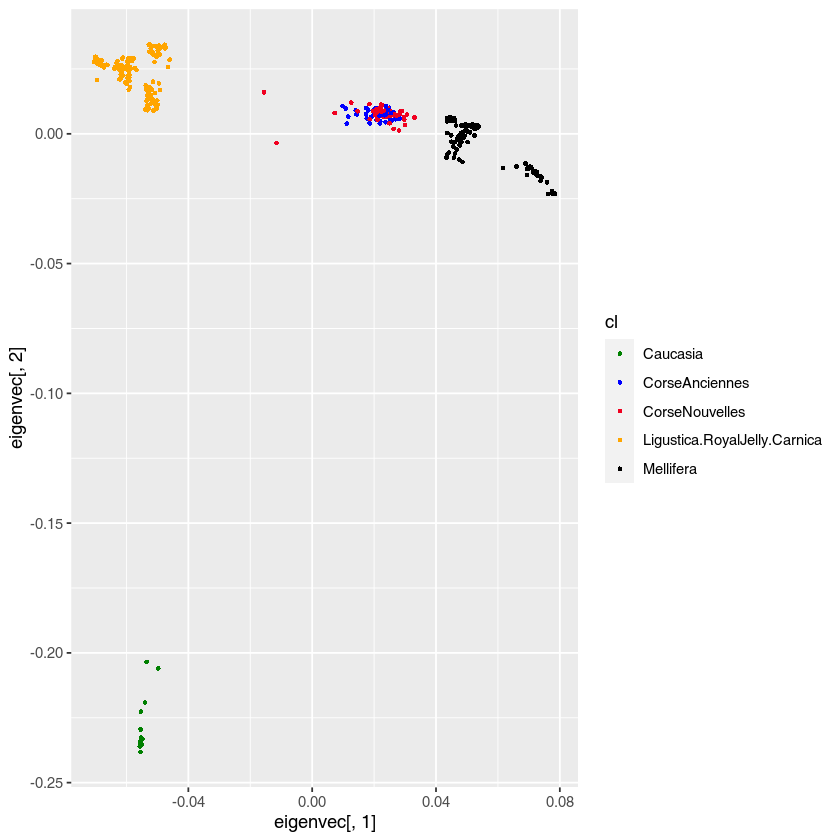

In [6]:
#Plot de la PCA

library (ggplot2)
ggplot (data=eigenvec, aes(x=eigenvec[,1], y=eigenvec[,2]),  group=eigenvec[,21])+
geom_point(aes(shape=cl, color=cl), size=1, shape=16) + 
scale_color_manual(values=c('#008000','#0000FF','#F00020','#FFA500',"#000000"))
                                                                

On remarque ici en effet que deux espèces CorseNouvelles sont beaucoup plus à gauche que les autres Corses (Anciennes et Nouvelles)

Cependant on a du mal à distinguer où se situent les anciennes des nouvelles corses, les une par rapport aux autres

On va donc chercher à identifier les 2 individus en marge des autres ( pour les corses ) 

<ggproto object: Class ScaleDiscrete, Scale, gg>
    aesthetics: colour
    axis_order: function
    break_info: function
    break_positions: function
    breaks: waiver
    call: call
    clone: function
    dimension: function
    drop: TRUE
    expand: waiver
    get_breaks: function
    get_breaks_minor: function
    get_labels: function
    get_limits: function
    guide: legend
    is_discrete: function
    is_empty: function
    labels: waiver
    limits: NULL
    make_sec_title: function
    make_title: function
    map: function
    map_df: function
    n.breaks.cache: NULL
    na.translate: TRUE
    na.value: grey50
    name: waiver
    palette: function
    palette.cache: NULL
    position: left
    range: <ggproto object: Class RangeDiscrete, Range, gg>
        range: NULL
        reset: function
        train: function
        super:  <ggproto object: Class RangeDiscrete, Range, gg>
    rescale: function
    reset: function
    scale_name: manual
    train: function
    t

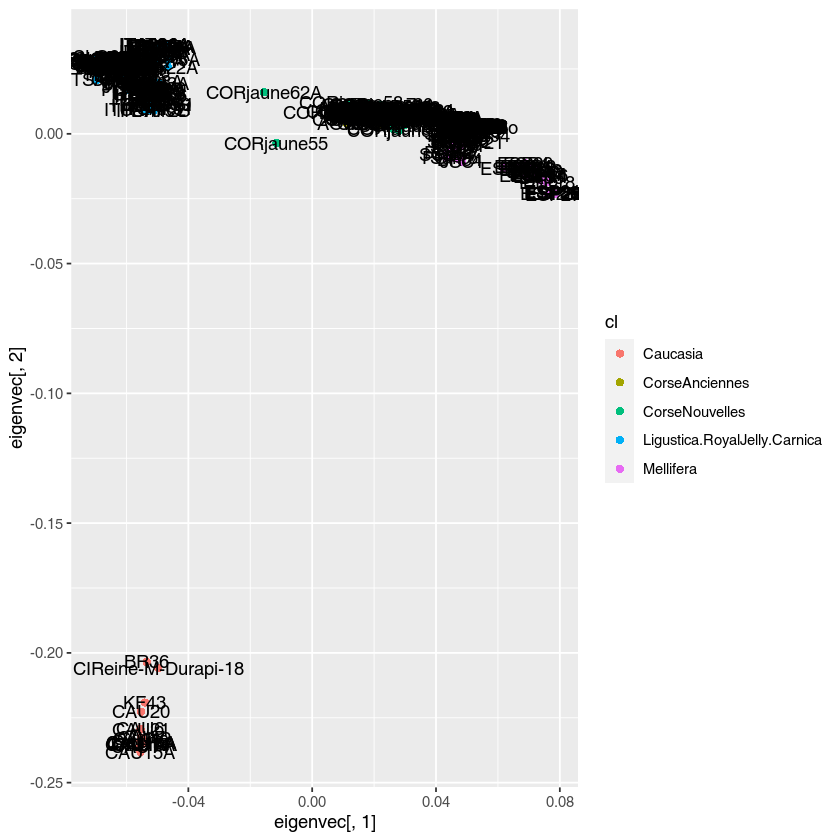

In [19]:
#Plot avec noms individus

library (ggplot2)
ggplot (data=eigenvec, aes(x=eigenvec[,1], y=eigenvec[,2]),  group=eigenvec[,21])+
geom_point(aes(shape=cl, color=cl), size=2, shape=16) + 
geom_text(label=rownames(eigenvec[,0]=='Mellifera'))
scale_color_manual(values=c('#008000','#0000FF','#F00020','#FFA500',"#000000"))
                                                                

Selon ce plot on peut donc identifier les 2 individus en marge des autres : 

- CORjaune62A : Mâle tres roux
- CORjaune55 : Reine, rousse +++, reine suspècte

Ici on cherche à savoir le positionnement des CorseAnciennes par rapport au CorseNouvelles:

Warning message:
“Removed 296 rows containing missing values (geom_point).”


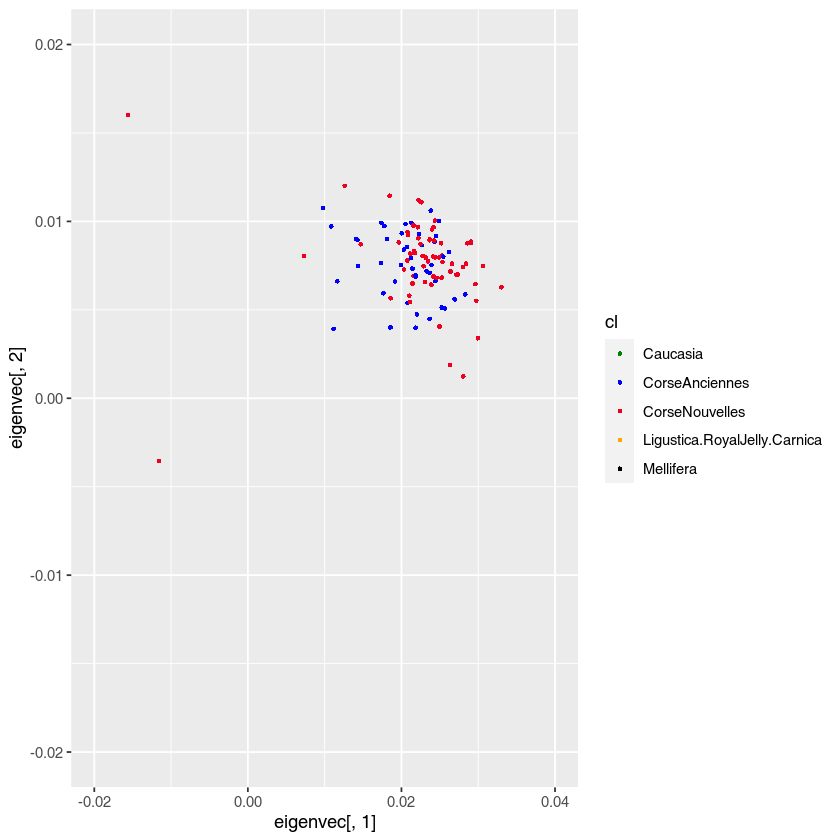

In [8]:
#Plot des Corses seulement

library (ggplot2)
ggplot (data=eigenvec, aes(x=eigenvec[,1], y=eigenvec[,2]),  group=eigenvec[,21])+
geom_point(aes(shape=cl, color=cl), size=1, shape=16) + 
scale_color_manual(values=c('#008000','#0000FF','#F00020','#FFA500',"#000000"))+
xlim(-0.02, 0.04) + ylim(-0.02, 0.02)               

On constate donc que les nouvelles sont plus à droite que les anciennes

On peut donc penser que cela ne semble pas être un probleme de fond génétique.


### PCA Filtre LD03 sur les 7M

In [10]:
setwd ("/home/avignal/Stage_M2/PlinkACP/plink/Plink_sansLD/")

In [11]:
#Lecture et réarrangement des Data


eigenvec_LD <- read.table('LD003/sorted_PCA_SeqApiPop_403_pca.eigenvec', header = FALSE, skip=0, sep = ' ')
rownames(eigenvec_LD) <- eigenvec_LD[,2] # on enlève la deuxieme colone redondante
eigenvec_LD <- eigenvec_LD[,3:ncol(eigenvec_LD)]
colnames(eigenvec_LD) <- paste('Principal.Component. ', c(1:20), sep = '')

eigenvec_LD

,Principal.Component. 1,Principal.Component. 2,Principal.Component. 3,Principal.Component. 4,Principal.Component. 5,Principal.Component. 6,Principal.Component. 7,Principal.Component. 8,Principal.Component. 9,Principal.Component. 10,Principal.Component. 11,Principal.Component. 12,Principal.Component. 13,Principal.Component. 14,Principal.Component. 15,Principal.Component. 16,Principal.Component. 17,Principal.Component. 18,Principal.Component. 19,Principal.Component. 20
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Ab-PacBio,0.05766820,-0.004420510,0.0149081,0.03257280,-0.0376224,0.069441600,1.26932e-02,2.00037e-03,7.29392e-03,-0.003029610,1.09626e-02,1.29676e-02,1.16128e-03,0.06863660,0.03983860,0.0121620,0.003356570,0.001679460,-0.001954630,0.00979469
AOC10,0.02325750,0.004610920,0.0156586,0.00895774,0.0637508,-0.001079840,-5.59008e-04,1.35976e-04,-5.55550e-05,0.000912687,-7.44003e-04,-7.67570e-04,-2.08513e-04,-0.02632040,-0.02753580,-0.0282344,-0.002247110,-0.002734540,-0.000484448,0.00476935
AOC11,0.02098840,0.003872100,0.0150347,0.00986938,0.0564420,-0.003132940,-7.98600e-05,2.92605e-04,1.77216e-04,-0.004556160,-7.51106e-04,1.59515e-03,4.56707e-04,-0.00529639,-0.01068770,-0.0134367,-0.000404912,0.000977708,-0.000351800,0.00704509
AOC12,0.01889260,0.006926420,0.0145916,0.01418980,0.0728102,-0.010466100,-5.43388e-04,4.77079e-04,3.58095e-04,0.002707790,-1.28151e-03,2.59569e-04,-5.51318e-04,-0.02436430,-0.03066140,-0.0369239,-0.005640130,-0.004642920,-0.002186620,0.00968149
AOC14,0.01154530,0.007435940,0.0188338,0.00660962,0.0621587,-0.020575800,-3.09019e-03,9.47934e-04,7.00353e-05,0.000416233,-7.95272e-05,6.95067e-04,-2.86498e-04,-0.01386390,-0.01776420,-0.0223761,-0.001881820,-0.000322157,-0.002653450,0.00732056
AOC15,0.02723700,0.004327940,0.0125736,0.01233070,0.0605633,0.002942800,7.49948e-04,9.20445e-04,-1.09038e-03,0.000486424,2.28623e-03,-6.16591e-04,-6.29035e-04,-0.01361700,-0.01556790,-0.0198296,0.000284513,-0.001458480,-0.000073272,0.00284491
AOC16,0.02017710,0.005308690,0.0179057,0.01114780,0.0669232,-0.010300700,-1.61886e-03,9.97985e-04,-1.16103e-03,-0.000498214,3.53165e-04,-7.43558e-04,1.17760e-03,-0.01754400,-0.02127500,-0.0261640,-0.002588900,-0.000781239,-0.001693970,0.00683617
AOC17,0.02782270,0.004181090,0.0146539,0.01193040,0.0491825,-0.001568710,1.60458e-04,2.15685e-04,4.42322e-04,0.002099050,-8.72549e-04,-5.14392e-04,-3.68831e-04,-0.01354640,-0.01477200,-0.0157141,-0.002771400,-0.003929650,-0.000110212,0.00145519
AOC18,0.02471720,0.001087880,0.0146958,0.01293100,0.0711458,-0.002715110,1.68103e-03,3.30627e-04,1.08090e-03,-0.001479180,-2.62402e-03,9.92192e-04,2.51838e-04,-0.02666270,-0.03123140,-0.0346208,-0.005924100,-0.003490390,-0.003706040,0.00691182


In [12]:
# Lecture de la data pour les espèces

couleur_LD <- read.table('couleur_sort_individu', sep="\t", header=TRUE, row.names=1)
couleur_LD
cl_LD=couleur_LD[,1]
cl_LD

,Species
,<fct>
AbPacBio,Mellifera
AOC10,CorseAnciennes
AOC11,CorseAnciennes
AOC12,CorseAnciennes
AOC14,CorseAnciennes
AOC15,CorseAnciennes
AOC16,CorseAnciennes
AOC17,CorseAnciennes
AOC18,CorseAnciennes


[1] Mellifera                    CorseAnciennes              
  [3] CorseAnciennes               CorseAnciennes              
  [5] CorseAnciennes               CorseAnciennes              
  [7] CorseAnciennes               CorseAnciennes              
  [9] CorseAnciennes               CorseAnciennes              
 [11] CorseAnciennes               CorseAnciennes              
 [13] CorseAnciennes               CorseAnciennes              
 [15] CorseAnciennes               CorseAnciennes              
 [17] CorseAnciennes               CorseAnciennes              
 [19] CorseAnciennes               CorseAnciennes              
 [21] CorseAnciennes               CorseAnciennes              
 [23] CorseAnciennes               CorseAnciennes              
 [25] CorseAnciennes               CorseAnciennes              
 [27] CorseAnciennes               CorseAnciennes              
 [29] CorseAnciennes               CorseAnciennes              
 [31] CorseAnciennes               CorseAnciennes              
 [33] CorseAnciennes               CorseAnciennes              
 [35] CorseAnciennes               CorseAnciennes              
 [37] CorseAnciennes               CorseAnciennes              
 [39] Ligustica.RoyalJelly.Carnica Ligustica.RoyalJelly.Carnica
 [41] Ligustica.RoyalJelly.Carnica Ligustica.RoyalJelly.Carnica
 [43] Ligustica.RoyalJelly.Carnica Ligustica.RoyalJelly.Carnica
 [45] Ligustica.RoyalJelly.Carnica Ligustica.RoyalJelly.Carnica
 [47] Ligustica.RoyalJelly.Carnica Ligustica.RoyalJelly.Carnica
 [49] Ligustica.RoyalJelly.Carnica Ligustica.RoyalJelly.Carnica
 [51] Ligustica.RoyalJelly.Carnica Ligustica.RoyalJelly.Carnica
 [53] Ligustica.RoyalJelly.Carnica Ligustica.RoyalJelly.Carnica
 [55] Mellifera                    Caucasia                    
 [57] Mellifera                    Mellifera                   
 [59] Mellifera                    Mellifera                   
 [61] Ligustica.RoyalJelly.Carnica Ligustica.RoyalJelly.Carnica
 [63] Ligustica.RoyalJelly.Carnica Ligustica.RoyalJelly.Carnica
 [65] Ligustica.RoyalJelly.Carnica Ligustica.RoyalJelly.Carnica
 [67] Ligustica.RoyalJelly.Carnica Ligustica.RoyalJelly.Carnica
 [69] Ligustica.RoyalJelly.Carnica Ligustica.RoyalJelly.Carnica
 [71] Ligustica.RoyalJelly.Carnica Ligustica.RoyalJelly.Carnica
 [73] Ligustica.RoyalJelly.Carnica Ligustica.RoyalJelly.Carnica
 [75] Ligustica.RoyalJelly.Carnica Ligustica.RoyalJelly.Carnica
 [77] Ligustica.RoyalJelly.Carnica Ligustica.RoyalJelly.Carnica
 [79] Ligustica.RoyalJelly.Carnica Ligustica.RoyalJelly.Carnica
 [81] Caucasia                     Caucasia                    
 [83] Caucasia                     Caucasia                    
 [85] Caucasia                     Caucasia                    
 [87] Caucasia                     Caucasia                    
 [89] Caucasia                     Caucasia                    
 [91] Caucasia                     Caucasia                    
 [93] Caucasia                     Caucasia                    
 [95] Caucasia                     CorseNouvelles              
 [97] CorseNouvelles               CorseNouvelles              
 [99] CorseNouvelles               CorseNouvelles              
[101] CorseNouvelles               CorseNouvelles              
[103] CorseNouvelles               CorseNouvelles              
[105] CorseNouvelles               CorseNouvelles              
[107] CorseNouvelles               CorseNouvelles              
[109] CorseNouvelles               CorseNouvelles              
[111] CorseNouvelles               CorseNouvelles              
[113] CorseNouvelles               CorseNouvelles              
[115] CorseNouvelles               CorseNouvelles              
[117] CorseNouvelles               CorseNouvelles              
[119] CorseNouvelles               CorseNouvelles              
[121] CorseNouvelles               CorseNouvelles              
[123] CorseNouvelles               CorseNouvelles              
[125] CorseNouvelles              

In [13]:
# Ajout de la colone espèce aux data

cbind(eigenvec_LD, cl_LD)
eigenvec_LD

,Principal.Component. 1,Principal.Component. 2,Principal.Component. 3,Principal.Component. 4,Principal.Component. 5,Principal.Component. 6,Principal.Component. 7,Principal.Component. 8,Principal.Component. 9,Principal.Component. 10,⋯,Principal.Component. 12,Principal.Component. 13,Principal.Component. 14,Principal.Component. 15,Principal.Component. 16,Principal.Component. 17,Principal.Component. 18,Principal.Component. 19,Principal.Component. 20,cl_LD
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
Ab-PacBio,0.05766820,-0.004420510,0.0149081,0.03257280,-0.0376224,0.069441600,1.26932e-02,2.00037e-03,7.29392e-03,-0.003029610,⋯,1.29676e-02,1.16128e-03,0.06863660,0.03983860,0.0121620,0.003356570,0.001679460,-0.001954630,0.00979469,Mellifera
AOC10,0.02325750,0.004610920,0.0156586,0.00895774,0.0637508,-0.001079840,-5.59008e-04,1.35976e-04,-5.55550e-05,0.000912687,⋯,-7.67570e-04,-2.08513e-04,-0.02632040,-0.02753580,-0.0282344,-0.002247110,-0.002734540,-0.000484448,0.00476935,CorseAnciennes
AOC11,0.02098840,0.003872100,0.0150347,0.00986938,0.0564420,-0.003132940,-7.98600e-05,2.92605e-04,1.77216e-04,-0.004556160,⋯,1.59515e-03,4.56707e-04,-0.00529639,-0.01068770,-0.0134367,-0.000404912,0.000977708,-0.000351800,0.00704509,CorseAnciennes
AOC12,0.01889260,0.006926420,0.0145916,0.01418980,0.0728102,-0.010466100,-5.43388e-04,4.77079e-04,3.58095e-04,0.002707790,⋯,2.59569e-04,-5.51318e-04,-0.02436430,-0.03066140,-0.0369239,-0.005640130,-0.004642920,-0.002186620,0.00968149,CorseAnciennes
AOC14,0.01154530,0.007435940,0.0188338,0.00660962,0.0621587,-0.020575800,-3.09019e-03,9.47934e-04,7.00353e-05,0.000416233,⋯,6.95067e-04,-2.86498e-04,-0.01386390,-0.01776420,-0.0223761,-0.001881820,-0.000322157,-0.002653450,0.00732056,CorseAnciennes
AOC15,0.02723700,0.004327940,0.0125736,0.01233070,0.0605633,0.002942800,7.49948e-04,9.20445e-04,-1.09038e-03,0.000486424,⋯,-6.16591e-04,-6.29035e-04,-0.01361700,-0.01556790,-0.0198296,0.000284513,-0.001458480,-0.000073272,0.00284491,CorseAnciennes
AOC16,0.02017710,0.005308690,0.0179057,0.01114780,0.0669232,-0.010300700,-1.61886e-03,9.97985e-04,-1.16103e-03,-0.000498214,⋯,-7.43558e-04,1.17760e-03,-0.01754400,-0.02127500,-0.0261640,-0.002588900,-0.000781239,-0.001693970,0.00683617,CorseAnciennes
AOC17,0.02782270,0.004181090,0.0146539,0.01193040,0.0491825,-0.001568710,1.60458e-04,2.15685e-04,4.42322e-04,0.002099050,⋯,-5.14392e-04,-3.68831e-04,-0.01354640,-0.01477200,-0.0157141,-0.002771400,-0.003929650,-0.000110212,0.00145519,CorseAnciennes
AOC18,0.02471720,0.001087880,0.0146958,0.01293100,0.0711458,-0.002715110,1.68103e-03,3.30627e-04,1.08090e-03,-0.001479180,⋯,9.92192e-04,2.51838e-04,-0.02666270,-0.03123140,-0.0346208,-0.005924100,-0.003490390,-0.003706040,0.00691182,CorseAnciennes


,Principal.Component. 1,Principal.Component. 2,Principal.Component. 3,Principal.Component. 4,Principal.Component. 5,Principal.Component. 6,Principal.Component. 7,Principal.Component. 8,Principal.Component. 9,Principal.Component. 10,Principal.Component. 11,Principal.Component. 12,Principal.Component. 13,Principal.Component. 14,Principal.Component. 15,Principal.Component. 16,Principal.Component. 17,Principal.Component. 18,Principal.Component. 19,Principal.Component. 20
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Ab-PacBio,0.05766820,-0.004420510,0.0149081,0.03257280,-0.0376224,0.069441600,1.26932e-02,2.00037e-03,7.29392e-03,-0.003029610,1.09626e-02,1.29676e-02,1.16128e-03,0.06863660,0.03983860,0.0121620,0.003356570,0.001679460,-0.001954630,0.00979469
AOC10,0.02325750,0.004610920,0.0156586,0.00895774,0.0637508,-0.001079840,-5.59008e-04,1.35976e-04,-5.55550e-05,0.000912687,-7.44003e-04,-7.67570e-04,-2.08513e-04,-0.02632040,-0.02753580,-0.0282344,-0.002247110,-0.002734540,-0.000484448,0.00476935
AOC11,0.02098840,0.003872100,0.0150347,0.00986938,0.0564420,-0.003132940,-7.98600e-05,2.92605e-04,1.77216e-04,-0.004556160,-7.51106e-04,1.59515e-03,4.56707e-04,-0.00529639,-0.01068770,-0.0134367,-0.000404912,0.000977708,-0.000351800,0.00704509
AOC12,0.01889260,0.006926420,0.0145916,0.01418980,0.0728102,-0.010466100,-5.43388e-04,4.77079e-04,3.58095e-04,0.002707790,-1.28151e-03,2.59569e-04,-5.51318e-04,-0.02436430,-0.03066140,-0.0369239,-0.005640130,-0.004642920,-0.002186620,0.00968149
AOC14,0.01154530,0.007435940,0.0188338,0.00660962,0.0621587,-0.020575800,-3.09019e-03,9.47934e-04,7.00353e-05,0.000416233,-7.95272e-05,6.95067e-04,-2.86498e-04,-0.01386390,-0.01776420,-0.0223761,-0.001881820,-0.000322157,-0.002653450,0.00732056
AOC15,0.02723700,0.004327940,0.0125736,0.01233070,0.0605633,0.002942800,7.49948e-04,9.20445e-04,-1.09038e-03,0.000486424,2.28623e-03,-6.16591e-04,-6.29035e-04,-0.01361700,-0.01556790,-0.0198296,0.000284513,-0.001458480,-0.000073272,0.00284491
AOC16,0.02017710,0.005308690,0.0179057,0.01114780,0.0669232,-0.010300700,-1.61886e-03,9.97985e-04,-1.16103e-03,-0.000498214,3.53165e-04,-7.43558e-04,1.17760e-03,-0.01754400,-0.02127500,-0.0261640,-0.002588900,-0.000781239,-0.001693970,0.00683617
AOC17,0.02782270,0.004181090,0.0146539,0.01193040,0.0491825,-0.001568710,1.60458e-04,2.15685e-04,4.42322e-04,0.002099050,-8.72549e-04,-5.14392e-04,-3.68831e-04,-0.01354640,-0.01477200,-0.0157141,-0.002771400,-0.003929650,-0.000110212,0.00145519
AOC18,0.02471720,0.001087880,0.0146958,0.01293100,0.0711458,-0.002715110,1.68103e-03,3.30627e-04,1.08090e-03,-0.001479180,-2.62402e-03,9.92192e-04,2.51838e-04,-0.02666270,-0.03123140,-0.0346208,-0.005924100,-0.003490390,-0.003706040,0.00691182


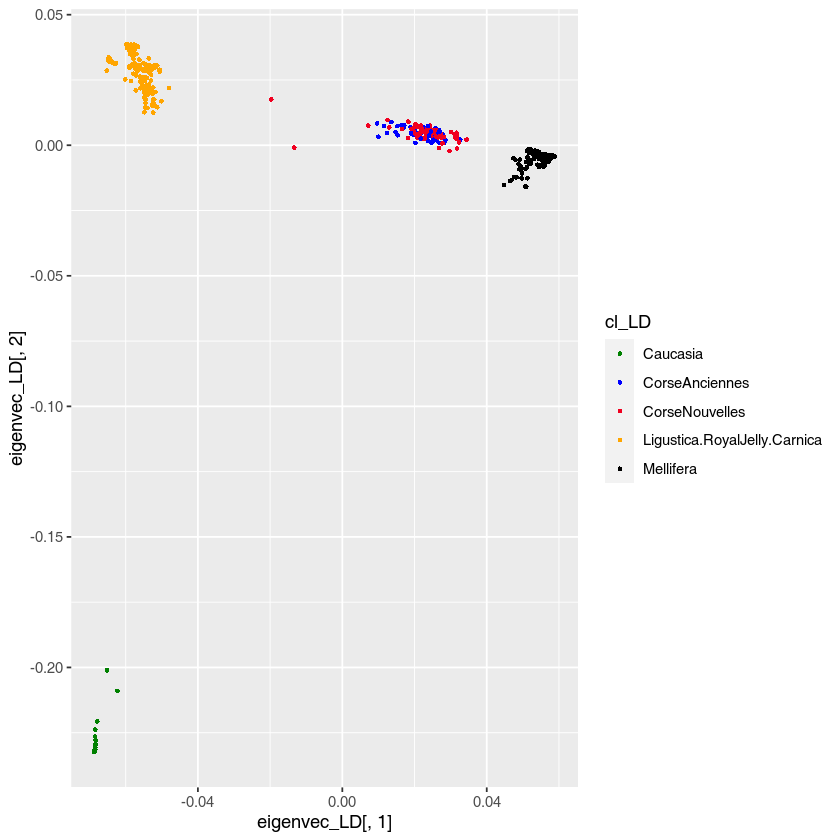

In [20]:
#Plot de la PCA 

library (ggplot2)
ggplot (data=eigenvec_LD, aes(x=eigenvec_LD[,1], y=eigenvec_LD[,2]),  group=eigenvec_LD[,21])+
geom_point(aes(shape=cl, color=cl_LD), size=1, shape=16) + 
scale_color_manual(values=c('#008000','#0000FF','#F00020','#FFA500',"#000000"))
                                                                